In [2]:
 import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/open?id=12VedSC0rIitaHUJQPwAgSo9y7FTbd6iE'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df3 = pd.read_csv('Filename.csv')

12VedSC0rIitaHUJQPwAgSo9y7FTbd6iE


In [0]:
# link = 'https://drive.google.com/open?id=1fQVb0GWT8Jv5bzElMTOdeQWDtA3wQO8o'
# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('Filename.csv')  
# SK5 = pd.read_csv('Filename.csv')
# link = 'https://drive.google.com/open?id=1NSOKdGV0jUj5h8V8kcOcmCzVDnQjvEr-'
# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('Filename.csv')  
# SK10 = pd.read_csv('Filename.csv')
# link = 'https://drive.google.com/open?id=1vVU_pb2FcAEks7v5MASJCXq3ujWfwIK2'
# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('Filename.csv')  
# SK50 = pd.read_csv('Filename.csv')


In [0]:
# SK5=SK5.to_numpy()
# SK10=SK10.to_numpy()
# SK50=SK50.to_numpy()

In [0]:
import gzip
import os
import sys
import struct
import numpy as np

def read_image(fi):
    magic, n, rows, columns = struct.unpack(">IIII", fi.read(16))
    assert magic == 0x00000803
    assert rows == 28
    assert columns == 28
    rawbuffer = fi.read()
    assert len(rawbuffer) == n * rows * columns
    rawdata = np.frombuffer(rawbuffer, dtype='>u1', count=n*rows*columns)
    return rawdata.reshape(n, rows, columns).astype(np.float32) / 255.0

def read_label(fi):
    magic, n = struct.unpack(">II", fi.read(8))
    assert magic == 0x00000801
    rawbuffer = fi.read()
    assert len(rawbuffer) == n
    return np.frombuffer(rawbuffer, dtype='>u1', count=n)

if __name__ == '__main__':
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')
    
    np.savez_compressed(
        'mnist',
        train_x=read_image(gzip.open('train-images-idx3-ubyte.gz', 'rb')),
        train_y=read_label(gzip.open('train-labels-idx1-ubyte.gz', 'rb')),
        test_x=read_image(gzip.open('t10k-images-idx3-ubyte.gz', 'rb')),
        test_y=read_label(gzip.open('t10k-labels-idx1-ubyte.gz', 'rb'))
    )

In [5]:
import numpy as np
data = np.load('mnist.npz')

print(data['train_x'].shape, data['train_x'].dtype)
print(data['train_y'].shape, data['train_y'].dtype)
print(data['test_x'].shape, data['test_x'].dtype)
print(data['test_y'].shape, data['test_y'].dtype)

(60000, 28, 28) float32
(60000,) uint8
(10000, 28, 28) float32
(10000,) uint8


In [0]:
def SP(data,K):
  #data=np.reshape(data,[784,158])
  A=data
  #A=np.transpose(data)
  At=data
  inds=np.zeros(K,);
  inds=inds.astype(int)
  iter=0
  for k in range(0,K):
    iter=iter+1
    [U,S,V]=np.linalg.svd(At,full_matrices=False)
    u=U[:,0]
    v=V[:,0]
    N=np.linalg.norm(At,axis=0)
    B=At/N
    B=np.transpose(B)
    Cr=np.abs(np.matmul(B,u))
    ind=np.argsort(Cr)[::-1]
    p=ind[0]
    inds[k]=p
    A3=A[:,inds[0:k+1]]
    At=A-np.matmul(np.matmul(A3,np.linalg.pinv(np.matmul(np.transpose(A3),A3))),np.matmul(np.transpose(A3),A))
  # ind2=np.zeros(K-1,);
  # for iter in range(1,5):
  #   for k in range(0,K):
  #     ind2=np.delete(inds,k)
  #     A3=A[:,ind2]
  #     At=A-np.matmul(np.matmul(A3,np.linalg.pinv(np.matmul(np.transpose(A3),A3))),np.matmul(np.transpose(A3),A))
  #     [U,S,V]=np.linalg.svd(At,full_matrices=False)
  #     u=U[:,1]
  #     v=V[:,1]
  #     N=np.linalg.norm(At,axis=0)
  #     B=At/N
  #     B=np.transpose(B)
  #     Cr=np.abs(np.matmul(B,u))
  #     ind=np.argsort(Cr)[::-1]
  #     p=ind[0]
  #     inds[k]=p
  return inds

In [0]:
data = np.load('mnist.npz')
x=data['train_x']
y=data['train_y']
xx=data['test_x']
yy=data['test_y']
#ind=np.array(np.where(y<6))[0]
#dtr=x[ind,:,:]
dtr=x
#ytr=y[ind]
ytr=y
#ind=np.array(np.where(yy<6))[0]
#dte=xx[ind,:,:]
dte=xx
#yte=yy[ind]
yte=yy
ind0=np.where(y==0)
ind0=np.array(ind0)
ind1=np.where(y==1)
ind1=np.array(ind1)
ind2=np.where(y==2)
ind2=np.array(ind2)
ind3=np.where(y==3)
ind3=np.array(ind3)
ind4=np.where(y==4)
ind4=np.array(ind4)
ind5=np.where(y==5)
ind5=np.array(ind5)
ind6=np.where(y==6)
ind6=np.array(ind6)
ind7=np.where(y==7)
ind7=np.array(ind7)
ind8=np.where(y==8)
ind8=np.array(ind8)
ind9=np.where(y==9)
ind9=np.array(ind9)
d0=np.transpose(np.reshape(dtr[ind0,:,:][0],[dtr[ind0,:,:].shape[1],784]))
d1=np.transpose(np.reshape(dtr[ind1,:,:][0],[dtr[ind1,:,:].shape[1],784]))
d2=np.transpose(np.reshape(dtr[ind2,:,:][0],[dtr[ind2,:,:].shape[1],784]))
d3=np.transpose(np.reshape(dtr[ind3,:,:][0],[dtr[ind3,:,:].shape[1],784]))
d4=np.transpose(np.reshape(dtr[ind4,:,:][0],[dtr[ind4,:,:].shape[1],784]))
d5=np.transpose(np.reshape(dtr[ind5,:,:][0],[dtr[ind5,:,:].shape[1],784]))
d6=np.transpose(np.reshape(dtr[ind6,:,:][0],[dtr[ind6,:,:].shape[1],784]))
d7=np.transpose(np.reshape(dtr[ind7,:,:][0],[dtr[ind7,:,:].shape[1],784]))
d8=np.transpose(np.reshape(dtr[ind8,:,:][0],[dtr[ind8,:,:].shape[1],784]))
d9=np.transpose(np.reshape(dtr[ind9,:,:][0],[dtr[ind9,:,:].shape[1],784]))


In [7]:
from google.colab import files
import pandas as pd

D0=pd.DataFrame(d0)
D0.to_csv('D0.csv')
files.download('D0.csv')  
D1=pd.DataFrame(d1)
D1.to_csv('D1.csv') 
files.download('D1.csv') 
D2=pd.DataFrame(d2)
D2.to_csv('D2.csv')
files.download('D2.csv')  
D3=pd.DataFrame(d3)
D3.to_csv('D3.csv')
files.download('D3.csv')  
D4=pd.DataFrame(d4)
D4.to_csv('D4.csv') 
files.download('D4.csv') 
D5=pd.DataFrame(d5)
D5.to_csv('D5.csv')
files.download('D5.csv')
D6=pd.DataFrame(d6)
D6.to_csv('D6.csv')
files.download('D6.csv')  
D7=pd.DataFrame(d7)
D7.to_csv('D7.csv') 
files.download('D7.csv') 
D8=pd.DataFrame(d8)
D8.to_csv('D8.csv')
files.download('D8.csv')  
D9=pd.DataFrame(d9)
D9.to_csv('D9.csv')
files.download('D9.csv')  


KeyboardInterrupt: ignored

In [0]:
DK=20;
S0=SP(d0,K)
S1=SP(d1,K)
print('here')
S2=SP(d2,K)
S3=SP(d3,K)
S4=SP(d4,K)
print('here')
S5=SP(d5,K)
S6=SP(d6,K)
S7=SP(d7,K)
print('here')
S8=SP(d8,K)
S9=SP(d9,K)

In [0]:
S0=np.array([530,3765,584,1875,4674,3885,298,3680,1030,3350,5098,3346,1524,3006,1782,2635,1511,3234,5228,2036,2019,5030,5040,481,3736,1861,4409,5226,1555,3001,452,460,4513,5690])
S1=np.array([1108,4388,898,6735,676,5537,40,1344,6026,3690,2552,3925,804,4458,3308,447,2429,5023,2740,5685,992,726])
S2=np.array([3228,842,2378,2262,362,961,	2806,	1381,	311,	2046,	2942,	5836,	2124,	5801,	1361,	5171,	4969	,2465,	5956,	358,	5421,	326,	1174,	3272,	986,	2413,	1519,	51,	2910,	1212,	1019,	5407,	2278,	222,	2241,	3814,	1786,	1022,	4337,	4977,	4491,	1673,	3062,	5318,	2337,	5497,	2005,	2864,	4939,	3585	,54,	425,	1138,	271,	2449,	284])
S3=np.array([2268	,1818	,1186	,2259	,1750	,2295	,852	,3783	,2267	,788	,3710	,1432	,630	,2297	,3973	,2419	,5951	,3114	,2262	,576	,1870	,381	,268	,1040	,738	,980	,486	,2720	,5333	,5282	,2171	,937	,4600	,5499	,5849	,3693	,1525	,1482	,5854	,1252	,2626	,3787	,2030	,2970	,4815	,2946	,501	,686	,3626	,2688	,391	,5074	,5559	,4056	,4329])
S4=np.array([935,	4478,	109,	3523,	536,	3698,	245,	436,	2657,	1305,	5515,	231,	3724,	676,	376,	2671,	1175,	2442,	977,	4954,	2010,	2140,	2198,	799,	1637,	1711,	1780,	3156,	5727,	2507,	4541,	3133,	1605,	4944,	3361,	1346,	4895,	5797,	2763,	5199,	5619,	2447,	677,	2379,	4902,	793,	3315,	2246,	45,	1254,	2184])
S5=np.array([3476	,3781	,4784	,189	,1469	,4505	,4919	,1460	,1954	,5179	,5158	,2008	,4733	,4456	,2259	,2152	,1945	,886	,1062	,682	,4165	,57	,2670	,1630	,78	,3104	,3542	,1239	,2722	,4058	,4994	,1667	,3168	,3282	,671	,5086	,2056	,3465	,2564	,4928	,2423	,2089	,3370	,3527	,5361	,4946	,4470	,1462	,2041	,3043	,528	,3268	,3923	,4515,	2367	,2726	,2333	,2567])
S6=np.array([3570	,4805	,5389	,929	,5557	,2789	,4530	,193	,2481	,4074	,4038	,1926	,2730	,2738	,4350	,2133	,3293	,1326	,5006	,848	,2608	,2666	,2419	,5309	,1238	,1144	,1198	,5530	,5834	,1517	,2111	,2792	,4212	,5846	,2479	,4567	,5433	,5199	,3435	,3037	,4895	,677])
S7=np.array([3751	,2340	,3822	,2192	,1565	,1147	,1988,	4416	,5976	,2492	,1011	,3985	,5143	,6035	,4553	,3779	,749	,6192	,2810	,4454	,3637	,3936	,4352	,5998	,5207	,5969	,4138	,4938	,274	,2818	,5924	,1702	,1156	,6114	,1673	,3391	,3675	,2495	,3270	,243	,2354	,3019	,5023])
S8=np.array([1932	,2178	,1329	,4506	,3763	,2137	,1246	,4777	,3548	,1290	,3173	,3123	,2693	,401	,985	,2984	,4941	,3816	,2721	,1262	,4616	,690	,3710	,4317	,5166	,5481	,5598	,257	,638	,4540	,5039	,5591	,5110	,3180	,2182	,2813	,4968	,2275	,3567	,1712	,282	,3100	,2993	,5755	,5690	,516	,295	,1058,	4386	,5059	,2320	,2600	,2816	,4157	,5611])
S9=np.array([3084,	4901,	670,	1205,	1800,	3000,	3098,	2111,	5044,	4969,	647,	4285,	1150,	4360,	1864,	2102,	3493,	2452,	3255,	3834,	2498,	3169,	3750,	2027,	993,	910,	765,	5846,	2570,	4886,	729,	4733,	2474	,3152,	365,	3564,	853,	663,	2032	,1868	,1711	,2193	,2773])

In [0]:
S0=S0-1
S1=S1-1
S2=S2-1
S3=S3-1
S4=S4-1
S5=S5-1
S6=S6-1
S7=S7-1
S8=S8-1
S9=S9-1

In [0]:
S0=np.array([3672, 3906, 4745, 4080, 1486, 1808, 1011,  591, 3509, 2029, 1827, 2411, 5448, 2875, 2681, 3683,  831, 5203, 5631, 4878])
S1=np.array([3121, 2871, 2328, 5804, 2616, 1807, 5637, 1476,  285, 6023,  854, 5316, 6223, 4205, 5973, 5859, 5240, 5384, 6388, 5871])
S2=np.array([3707, 3191,  151, 5478, 2349,  384, 4132, 5500, 2997, 1555, 1972, 4930, 4840, 1302, 3295, 1250, 1935, 5823, 5563, 5856])
S3=np.array([4292, 1469, 4173, 3566,  911, 4849,  366, 5101, 1238, 2363,  511, 1302, 5979,  722, 1328, 4528, 5587, 5550, 5617, 5129])
S4=np.array([2580, 2483, 1427, 3920, 5839, 3848, 2282, 3012, 1937, 3619, 3043, 4907, 2367, 3689, 1028, 3215,  724, 2659, 4728, 4540])
S5=np.array([3772, 4124, 3158, 2530, 1336, 3228, 1175,   52, 4328,  651, 1951, 3788, 5114,  541, 545, 1714, 1059,  757,  966, 2418])
S6=np.array([ 590,  580, 5691, 2862, 2574, 4424, 5038, 5398, 1122, 4920,  311, 3425, 3655, 3752, 4310,  501, 1144, 2896, 2381, 1763])
S7=np.array([3754, 4159, 3648, 1189, 1147, 3540, 4036, 2166,  430, 3629, 1617, 5613, 3255, 2679, 5332, 5487, 2264, 6107, 4139, 4423])
S8=np.array([2113, 3158, 1678,  337, 5053, 5294,  426, 4047, 1610, 3091, 4651, 3312, 2623, 2808, 2432, 5349,  354, 4973, 5771, 1235])
S9=np.array([2348, 5636, 5037, 3060, 3699, 5432,  762,  968, 1416,  161, 5699, 2032, 1974, 5678, 1694, 2183, 5248, 2090, 4191,   79])

In [0]:
S90=S80=S70=S60=S50=S40=S30=S20=S10=S00=np.arange(30)
S0=np.concatenate((S0,S00))
S1=np.concatenate((S1,S00))
S2=np.concatenate((S2,S00))
S3=np.concatenate((S3,S00))
S4=np.concatenate((S4,S00))
S5=np.concatenate((S5,S00))
S6=np.concatenate((S6,S00))
S7=np.concatenate((S7,S00))
S8=np.concatenate((S8,S00))
S9=np.concatenate((S9,S00))
# S0=np.arange(46)
# S1=np.arange(46)
# S2=np.arange(46)
# S3=np.arange(46)
# S4=np.arange(46)
# S5=np.arange(46)
# S6=np.arange(46)
# S7=np.arange(46)
# S8=np.arange(46)
# S9=np.arange(46)

In [0]:

Data0_sel=d0[:,S0]
Data1_sel=d1[:,S1]
Data2_sel=d2[:,S2]
Data3_sel=d3[:,S3]
Data4_sel=d4[:,S4]
Data5_sel=d5[:,S5]
Data6_sel=d6[:,S6]
Data7_sel=d7[:,S7]
Data8_sel=d8[:,S8]
Data9_sel=d9[:,S9]


In [0]:
Data0_sel=np.concatenate((Data0_sel,np.ones([784,1])),axis=1)
Data1_sel=np.concatenate((Data1_sel,np.ones([784,1])),axis=1)
Data2_sel=np.concatenate((Data2_sel,np.ones([784,1])),axis=1)
Data3_sel=np.concatenate((Data3_sel,np.ones([784,1])),axis=1)
Data4_sel=np.concatenate((Data4_sel,np.ones([784,1])),axis=1)
Data5_sel=np.concatenate((Data5_sel,np.ones([784,1])),axis=1)
Data6_sel=np.concatenate((Data6_sel,np.ones([784,1])),axis=1)
Data7_sel=np.concatenate((Data7_sel,np.ones([784,1])),axis=1)
Data8_sel=np.concatenate((Data8_sel,np.ones([784,1])),axis=1)
Data9_sel=np.concatenate((Data9_sel,np.ones([784,1])),axis=1)


In [0]:
df3=df3.to_numpy()
df3.astype('float32')
df3=255.-df3
df3/=255
# df3=df3-np.mean(df3)


In [14]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# x_train=x_train-np.mean(x_train)
# x_test=x_test-np.mean(x_test)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 18s 296us/step - loss: 0.2602 - acc: 0.9200 - val_loss: 0.0591 - val_acc: 0.9809
Epoch 2/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0883 - acc: 0.9734 - val_loss: 0.0414 - val_acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0694 - acc: 0.9795 - val_loss: 0.0398 - val_acc: 0.9866
Epoch 4/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0558 - acc: 0.9835 - val_loss: 0.0333 - val_acc: 0.9888
Epoch 5/12
60000/60000 [==============

In [0]:
# This part goes to open set detection 

# 1: We create a test dataset consisting of omniglot and the test data of the mnist itself 

opendata=np.concatenate((np.reshape(x_test,[len(x_test),784]),df3))
pred1=model.predict(np.reshape(opendata[0:20000,:],[20000,28,28,1]))
L1=np.zeros(20000,)
for i in range(20000):
  L1[i]=np.array(np.where(pred1[i,:]==np.max(pred1[i,:])))
#test_data=np.concatenate(df3,dte)
# 2: create the prediction, 


# We project the data on the selected data classes and find the error. We compare the error to a threshold to approve the labled class or deny it and protect classes form open data:


In [0]:
alpha=0.001;
P0=np.matmul(np.linalg.inv(np.matmul(np.transpose(Data0_sel),Data0_sel)+np.diag(np.multiply(np.ones(len(S0)+1),alpha))),np.transpose(Data0_sel))
P1=np.matmul(np.linalg.inv(np.matmul(np.transpose(Data1_sel),Data1_sel)+np.diag(np.multiply(np.ones(len(S1)+1),alpha))),np.transpose(Data1_sel))
P2=np.matmul(np.linalg.inv(np.matmul(np.transpose(Data2_sel),Data2_sel)+np.diag(np.multiply(np.ones(len(S2)+1),alpha))),np.transpose(Data2_sel))
P3=np.matmul(np.linalg.inv(np.matmul(np.transpose(Data3_sel),Data3_sel)+np.diag(np.multiply(np.ones(len(S3)+1),alpha))),np.transpose(Data3_sel))
P4=np.matmul(np.linalg.inv(np.matmul(np.transpose(Data4_sel),Data4_sel)+np.diag(np.multiply(np.ones(len(S4)+1),alpha))),np.transpose(Data4_sel))
P5=np.matmul(np.linalg.inv(np.matmul(np.transpose(Data5_sel),Data5_sel)+np.diag(np.multiply(np.ones(len(S5)+1),alpha))),np.transpose(Data5_sel))
P6=np.matmul(np.linalg.inv(np.matmul(np.transpose(Data6_sel),Data6_sel)+np.diag(np.multiply(np.ones(len(S6)+1),alpha))),np.transpose(Data6_sel))
P7=np.matmul(np.linalg.inv(np.matmul(np.transpose(Data7_sel),Data7_sel)+np.diag(np.multiply(np.ones(len(S7)+1),alpha))),np.transpose(Data7_sel))
P8=np.matmul(np.linalg.inv(np.matmul(np.transpose(Data8_sel),Data8_sel)+np.diag(np.multiply(np.ones(len(S8)+1),alpha))),np.transpose(Data8_sel))
P9=np.matmul(np.linalg.inv(np.matmul(np.transpose(Data9_sel),Data9_sel)+np.diag(np.multiply(np.ones(len(S9)+1),alpha))),np.transpose(Data9_sel))



In [0]:
import sklearn
from sklearn import metrics
y_true=np.zeros(20000,)
y_true[0:10000]=yy
y_true[10000:20000]=np.multiply(11,np.ones_like(y_true[10000:20000]))
y_true=np.zeros(20000,)
y_true[0:10000]=yy
y_true[10000:20000]=np.multiply(11,np.ones_like(y_true[10000:20000]))
yq=y_true
y_kos=np.zeros(20000,)
y_kos[y_true!=11]=0
y_kos[y_true==11]=1

No handles with labels found to put in legend.


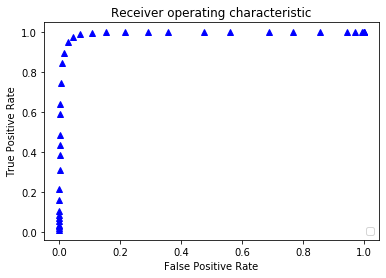

In [21]:
#P0=np.linalg.pinv(Data0_sel)
#P1=np.linalg.pinv(Data1_sel)
#P2=np.linalg.pinv(Data2_sel)
#P3=np.linalg.pinv(Data3_sel)
#P4=np.linalg.pinv(Data4_sel)
#P5=np.linalg.pinv(Data5_sel)
#P6=np.linalg.pinv(Data6_sel)
#P7=np.linalg.pinv(Data7_sel)
#P8=np.linalg.pinv(Data8_sel)
#P9=np.linalg.pinv(Data9_sel)
err=np.zeros(20000,)
y3=np.zeros(20000,)
L11=np.zeros(20000,)
y3=[yq[i] for i in range(20000)]
for i in range(20000):
   opendata[i,:]=opendata[i,:]/np.linalg.norm(opendata[i,:])
for kir  in range(1):
  for i in range(20000):
    if L1[i]==0:
      coef=np.matmul(P0,opendata[i,:])
      projected=np.matmul(Data0_sel,coef)
      err[i]=np.array(np.linalg.norm(projected-opendata[i,:]))
    if L1[i]==1:
      coef=np.matmul(P1,opendata[i,:])
      projected=np.matmul(Data1_sel,coef)
      err[i]=np.array(np.linalg.norm(projected-opendata[i,:]))
    if L1[i]==2:
      coef=np.matmul(P2,opendata[i,:])
      projected=np.matmul(Data2_sel,coef)
      err[i]=np.array(np.linalg.norm(projected-opendata[i,:]))
    if L1[i]==3:
      coef=np.matmul(P3,opendata[i,:])
      projected=np.matmul(Data3_sel,coef)
      err[i]=np.array(np.linalg.norm(projected-opendata[i,:]))        
    if L1[i]==4:
      coef=np.matmul(P4,opendata[i,:])
      projected=np.matmul(Data4_sel,coef)
      err[i]=np.array(np.linalg.norm(projected-opendata[i,:]))
    if L1[i]==5:
      coef=np.matmul(P5,opendata[i,:])
      projected=np.matmul(Data5_sel,coef)
      err[i]=np.array(np.linalg.norm(projected-opendata[i,:]))
    if L1[i]==6:
      coef=np.matmul(P6,opendata[i,:])
      projected=np.matmul(Data6_sel,coef)
      err[i]=np.array(np.linalg.norm(projected-opendata[i,:]))            
    if L1[i]==7:
      coef=np.matmul(P7,opendata[i,:])
      projected=np.matmul(Data7_sel,coef)
      err[i]=np.array(np.linalg.norm(projected-opendata[i,:]))
    if L1[i]==8:
      coef=np.matmul(P8,opendata[i,:])
      projected=np.matmul(Data8_sel,coef)
      err[i]=np.array(np.linalg.norm(projected-opendata[i,:]))
    if L1[i]==9:
      coef=np.matmul(P9,opendata[i,:])
      projected=np.matmul(Data9_sel,coef)
      err[i]=np.array(np.linalg.norm(projected-opendata[i,:])) 
#thresh=[0.000001,0.000005,0.00001, 0.00004, 0.00008, 0.0002,0.0004,0.0006, 0.001,0.005,0.01,0.02,0.04,0.06,0.08,0.1,0.13,0.16,0.19,0.21,0.25,0.28, 0.30, 0.33,0.35, 0.38,0.4,0.425, 0.45, 0.475,0.5, 0.525,0.55, 0.58, 0.6,0.625, 0.65,0.66, 0.68, 0.69, 0.7, 0.715,0.735, 0.75, 0.77, 0.78, 0.79, 0.8, 0.82, 0.83, 0.85, 0.88, 0.9, 0.93, 0.96]
thresh=[0.018,0.02,0.04,0.06,0.08,0.1,0.13,0.16,0.19,0.21,0.25,0.28, 0.30, 0.33,0.35, 0.38,0.4,0.425, 0.45, 0.475,0.5, 0.525,0.55, 0.58, 0.6,0.625, 0.65,0.66, 0.68, 0.69, 0.7, 0.715,0.735, 0.75, 0.77, 0.78, 0.79, 0.8, 0.82, 0.83, 0.85, 0.88]
Q=len(thresh)
tool=np.zeros(Q,)
arz=np.zeros(Q,)
TP=np.zeros(Q)
F1=np.zeros(Q)
FP=np.zeros(Q)
TN=np.zeros(Q)
roc_auc=np.zeros(Q,)
for q in range(Q):
  #threshold=thresh[q]
  threshold=thresh[q]
  Lb=np.zeros(20000,)
  for i in range(20000):
    if err[i]>threshold:
      L11[i]=11
    elif err[i]<=threshold:
      L11[i]=L1[i]
  
  Lb[L11!=11]=0
  Lb[L11==11]=1

# Compute micro-average ROC curve and ROC area
  #fpr, tpr, _ = roc_curve(Lb,y_kir)
  #print(tpr)
  #roc_auc[q] = auc(fpr,tpr)
  #FP[q]=fpr[1]*2
  #TP[q]=(tpr[1]-0.5)*2
  # tp=0
  # for i in range(20000):
  #   if Lb[i]==0 and y_kir[i]==0:
  #     tp=tp+1
  # TP[q]=1-tp/10000
  # tn=0
  # for i in range(20000):
  #   if Lb[i]!=0 and y_kir[i]==0:
  #     tn=tn+1
  # TN[q]=tn/10000
  # fp=0
  # for i in range(20000):
  #   if Lb[i]!=0 and y_kir[i]!=0:
  #     fp=fp+1
  # FP[q]=fp/10000
  oo=sklearn.metrics.roc_curve(y_kos, Lb)
  TP[q]=oo[1][1]
  FP[q]=oo[0][1]
  F1[q]=sklearn.metrics.f1_score(y_true, L11, average='macro')
import matplotlib.pyplot as plt
#plt.plot(TP,FP)
plt.figure()
lw = 2
plt.plot(FP,TP,'b^', lw=lw)
#plt.plot([0, 0.06], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 0.06])
#plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

In [0]:
TP_sel=TP
FP_sel=FP
F1_sel=F1

In [23]:
#np.transpose(thresh)
F1_sel

array([0.06060606, 0.06060606, 0.06060606, 0.06060606, 0.06060606,
       0.06060606, 0.06092992, 0.06941576, 0.09992742, 0.12990363,
       0.24241528, 0.35529277, 0.45217349, 0.59148991, 0.67211327,
       0.77146272, 0.82117409, 0.87276922, 0.91012862, 0.93659462,
       0.95357141, 0.95841546, 0.95520904, 0.93802275, 0.9171708 ,
       0.87825112, 0.83974039, 0.82120572, 0.78391597, 0.76660485,
       0.74876419, 0.7236723 , 0.69284107, 0.6739672 , 0.65452535,
       0.64755124, 0.64180377, 0.63707539, 0.63091575, 0.62872542,
       0.62514397, 0.62184073])

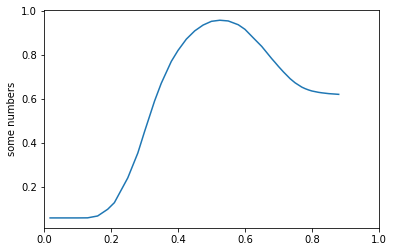

In [24]:
import matplotlib.pyplot as plt
plt.plot(np.array(thresh),F1)
plt.xlim([0.0, 1.0])
plt.ylabel('some numbers')
plt.show()

In [25]:
np.max(F1)

0.9584154594533975

In [26]:
np.mean(opendata[0000:10000])

0.013869191011000197